Componentes do Grupo:

Gabriel Franco - 2403394

Klaus Dieter Bernhard V Bartels - 2402752

Luiz Henrique Juvenal - 2401275

- Instalando e Importando Bibliotecas .

In [ ]:
pip install tensorflow keras

🔹 Importamos TensorFlow e Keras para modelagem da CNN, além de matplotlib para visualizar dados.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
# from keras.datasets import cifar10 #(50000, 32X32)

Passo 2: Carregamos o Dataset CIFAR-10 .Esse Dataset é um conjunto de imagens de 32x32 pixels divididas em 10 categorias. Normalizamos os pixels para facilitar o treinamento.  normalizamos os valores dos pixels (/255) das imagens para ficarem entre 0 e 1. Isso melhora o desempenho da rede, evitando que valores altos prejudiquem o aprendizado. Já quando usamos o One-hot encoding , serve como coversão... por exemplo, se a imagem for de um "carro" (classe 1), a conversão transforma isso em: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] . Isso facilita o treinamento em classificação multiclasse.




In [ ]:
# Carregar dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalizar os dados (entre 0 e 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Converter rótulos para formato categórico (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Passo 3: Criamos a Arquitetura da Rede Neural
Aqui usamos uma CNN com três camadas convolucionais seguidas de camadas densas. Usamos as três camadas convolucionais com BatchNormalization e Dropout para estabilizar o aprendizado.
Ou seja , Criamos um modelo sequencial, onde cada camada é adicionada uma após a outra.

Na primeira camada:
- Criamos uma camada convolucional com 64 filtros de tamanho 3x3.
- ReLU é a função de ativação usada para evitar valores negativos.
- Padding='same' mantém o tamanho da imagem igual após a convolução.
- input_shape=(32, 32, 3) define que nossa entrada tem 32x32 pixels e 3 canais de cor (RGB).
- Batch Normalization estabiliza o treinamento normalizando as ativações.Isso acelera o aprendizado e melhora a generalização.
- MaxPooling reduz o tamanho da imagem pela metade, selecionando apenas os valores mais importantes.
- Dropout desativa 20% dos neurônios aleatoriamente para evitar overfitting.

Na segunda camada:
- Criamos mais uma camada convolucional com 128 filtros.
- Batch Normalization para estabilizar.
- MaxPooling reduz mais a imagem.
- Dropout aumenta para 30%, já que a rede está ficando maior.

Na terceira camada:
- Agora temos 256 filtros, permitindo capturar padrões mais complexos.
- O Dropout sobe para 40%, reforçando a prevenção contra overfitting.


Na sequencia fazemos "Flatten" , ou seja, transforma nossa matriz em um vetor unidimensional, essencial para conectar com camadas densas.


Em seguida na camada totalmente conectada...
- 512 neurônios formam uma camada totalmente conectada.
- ReLU é usado para evitar valores negativos.
- Dropout alto (50%) para evitar memorizar os dados.


Camada de Saída para 10 Classes:
- A última camada tem 10 neurônios, correspondendo às 10 classes do CIFAR-10.
- A ativação softmax converte valores em probabilidades (exemplo: carro = 92% de chance).





In [ ]:
model = keras.Sequential([
    # Primeira camada convolucional
    layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),

    # Segunda camada convolucional
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),

    # Terceira camada convolucional
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),

    # Flatten para converter para um vetor unidimensional
    layers.Flatten(),

    # Camada totalmente conectada
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    # Camada de saída para 10 classes
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# n_classes = 10

Passo 4: Compilar e Treinar o Modelo.
Definimos o otimizador, a função de perda e métricas de avaliação, onde:   

Na compilação
- Adam é um otimizador avançado que ajusta automaticamente a taxa de aprendizado.
- A função de perda categorical_crossentropy é usada para classificação multiclasse.
- A métrica accuracy mede a acurácia do modelo.

No treinamento do Modelo:
- Treinamos por 30 épocas (cada época é um ciclo completo pelos dados).
- Batch size de 64 regula quantas imagens são processadas de cada vez.
- Validation data permite ver o desempenho no conjunto de teste.



In [ ]:
# Compilar o modelo
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinamento do modelo
history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 474s 601ms/step - accuracy: 0.3701 - loss: 2.1156 - val_accuracy: 0.5570 - val_loss: 1.3271
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 514s 617ms/step - accuracy: 0.5771 - loss: 1.2065 - val_accuracy: 0.6610 - val_loss: 0.9731
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 491s 603ms/step - accuracy: 0.6442 - loss: 1.0031 - val_accuracy: 0.6838 - val_loss: 0.8970
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 507s 611ms/step - accuracy: 0.6885 - loss: 0.8875 - val_accuracy: 0.7328 - val_loss: 0.7563
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 497s 604ms/step - accuracy: 0.7184 - loss: 0.8009 - val_accuracy: 0.7532 - val_loss: 0.7152
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 508s 612ms/step - accuracy: 0.7373 - loss: 0.7385 - val_accuracy: 0.7419 - val_loss: 0.7364
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 518s 633ms/step - accuracy: 0.7577 - loss: 0.6865 - val_accuracy: 0.7323 - val_loss: 0.7795
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 481s 607ms/step - accuracy: 0.7741 -

Passo 5: Avaliação do Modelo , onde após o treinamento, podemos testar a acurácia:

- Após o treinamento, medimos a acurácia final.
- Se o modelo estiver superajustado, a acurácia do teste será bem menor que a do treino.


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Acurácia no conjunto de teste: {test_acc:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 72ms/step - accuracy: 0.8370 - loss: 0.5425
Acurácia no conjunto de teste: 0.84


Resultados
Após os ajustes, conseguimos 84% de acurácia!
Isso foi possível graças a:
- Batch Normalization para estabilizar o aprendizado.
- Dropout alto para evitar overfitting.
- Camadas profundas para capturar detalhes mais complexos.
- Otimização com Adam para um treinamento mais eficiente.


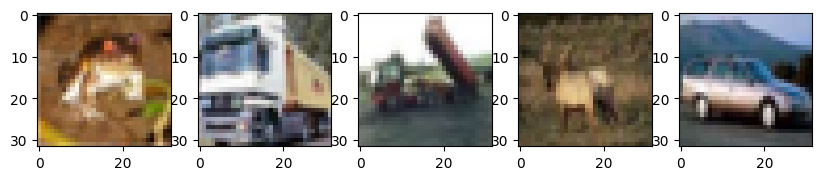

In [ ]:
fig = plt.figure()
for i in range(5):
    a = fig.add_subplot(1, 5, i + 1)
    img_num = np.random.randint(x_train.shape[0])
    image = x_train[i]
    id = y_train[i]
    plt.imshow(image)
fig.set_size_inches(10,10)
plt.show()

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])